<a href="https://colab.research.google.com/github/eladorpBG/ML_assignment4/blob/main/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -U ultralytics
!pip install rembg
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.4 MB/s eta 0:00:00


In [1]:
from scipy.io import loadmat
import torch

In [2]:
# download dataset from link https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz

!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz
!tar -xvzf 102segmentations.tgz
!tar -xvzf 102flowers.tgz

labels_mat = loadmat("imagelabels.mat")
labels = labels_mat["labels"]

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

In [3]:
# prompt: load jpg's to data

import numpy as np
from PIL import Image
import os

# Assuming images are in the 'jpg' directory
image_dir = 'jpg'
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Initialize an empty list to store image data
image_data = []

for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)
    try:
      img = Image.open(image_path)
      # Resize if needed
      # img = img.resize((224,224)) #Example resize to 224x224
      # img_array = np.array(img)
      image_data.append(img)
      print(f"Loaded image {i+1}/{len(image_files)}: {image_file}")
    except Exception as e:
      print(f"Error loading image {image_file}: {e}")

# Now image_data contains a list of NumPy arrays representing your images
# You can then convert it to a numpy array if needed:
# image_data_np = np.array(image_data)
#print(image_data_np.shape)


Streaming output truncated to the last 5000 lines.
Loaded image 3190/8189: image_04169.jpg
Loaded image 3191/8189: image_06145.jpg
Loaded image 3192/8189: image_06087.jpg
Loaded image 3193/8189: image_08031.jpg
Loaded image 3194/8189: image_03952.jpg
Loaded image 3195/8189: image_05282.jpg
Loaded image 3196/8189: image_05647.jpg
Loaded image 3197/8189: image_06248.jpg
Loaded image 3198/8189: image_02847.jpg
Loaded image 3199/8189: image_02378.jpg
Loaded image 3200/8189: image_02219.jpg
Loaded image 3201/8189: image_06741.jpg
Loaded image 3202/8189: image_02729.jpg
Loaded image 3203/8189: image_07566.jpg
Loaded image 3204/8189: image_00886.jpg
Loaded image 3205/8189: image_05648.jpg
Loaded image 3206/8189: image_03264.jpg
Loaded image 3207/8189: image_02635.jpg
Loaded image 3208/8189: image_04808.jpg
Loaded image 3209/8189: image_07753.jpg
Loaded image 3210/8189: image_02981.jpg
Loaded image 3211/8189: image_01937.jpg
Loaded image 3212/8189: image_06006.jpg
Loaded image 3213/8189: image

In [11]:
type(image_data[0])

PIL.JpegImagePlugin.JpegImageFile

In [22]:
# from PIL import Image
# from rembg import remove
output = remove(image_data[18])
output.save("BackgroundRemovedFlower.png")

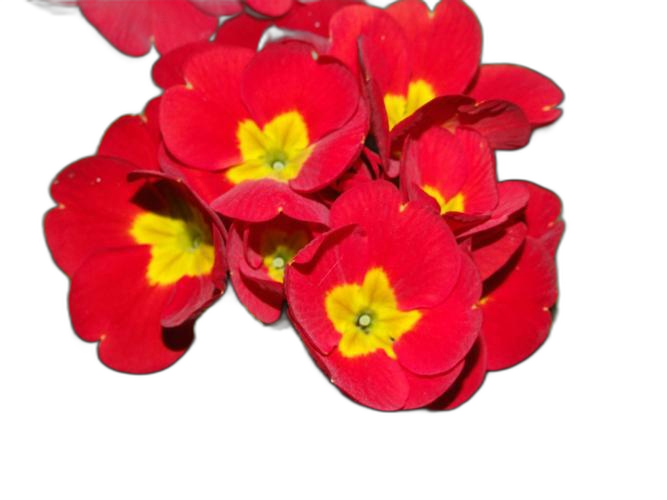

In [23]:
output

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

test_size = np.round(len(X) * 0.3).astype(int)

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp)


# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [44]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, autoshape=False)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-21 Python-3.11.11 torch-2.5.1+cu121 CPU



In [46]:
model

True

In [ ]:
# Inference
results = model(seg_data[:100])

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


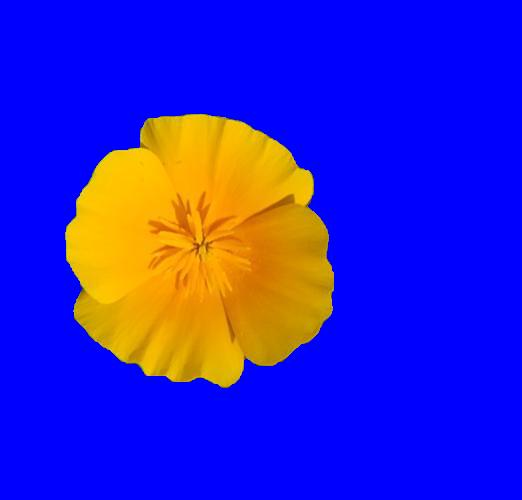

In [ ]:
# print(results[4])
display(seg_data[4])

In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz
!tar -xvzf 102segmentations.tgz



Streaming output truncated to the last 5000 lines.
segmim/segmim_02001.jpg
segmim/segmim_06248.jpg
segmim/segmim_07436.jpg
segmim/segmim_07409.jpg
segmim/segmim_06781.jpg
segmim/segmim_02394.jpg
segmim/segmim_05732.jpg
segmim/segmim_01096.jpg
segmim/segmim_02423.jpg
segmim/segmim_01421.jpg
segmim/segmim_02292.jpg
segmim/segmim_01972.jpg
segmim/segmim_07569.jpg
segmim/segmim_04956.jpg
segmim/segmim_03799.jpg
segmim/segmim_08141.jpg
segmim/segmim_06048.jpg
segmim/segmim_01065.jpg
segmim/segmim_07591.jpg
segmim/segmim_04813.jpg
segmim/segmim_05567.jpg
segmim/segmim_05523.jpg
segmim/segmim_00086.jpg
segmim/segmim_07378.jpg
segmim/segmim_01710.jpg
segmim/segmim_08030.jpg
segmim/segmim_03603.jpg
segmim/segmim_07303.jpg
segmim/segmim_00403.jpg
segmim/segmim_01079.jpg
segmim/segmim_01920.jpg
segmim/segmim_08041.jpg
segmim/segmim_00906.jpg
segmim/segmim_04960.jpg
segmim/segmim_00034.jpg
segmim/segmim_05586.jpg
segmim/segmim_02560.jpg
segmim/segmim_00634.jpg
segmim/segmim_02748.jpg
segmim/segmim

In [ ]:
# Assuming images are in the 'jpg' directory
seg_dir = 'segmim'
seg_files = [f for f in os.listdir(seg_dir) if f.endswith('.jpg')]

# Initialize an empty list to store image data
seg_data = []

for i, image_file in enumerate(seg_files):
    seg_path = os.path.join(seg_dir, image_file)
    try:
      img = Image.open(seg_path)
      # Resize if needed
      # img = img.resize((224,224)) #Example resize to 224x224
      # img_array = np.array(img)
      seg_data.append(img)
      print(f"Loaded image {i+1}/{len(seg_files)}: {image_file}")
    except Exception as e:
      print(f"Error loading image {image_file}: {e}")

# Now image_data contains a list of NumPy arrays representing your images
# You can then convert it to a numpy array if needed:
# image_data_np = np.array(image_data)
#print(image_data_np.shape)


Streaming output truncated to the last 5000 lines.
Loaded image 3190/8189: segmim_03533.jpg
Loaded image 3191/8189: segmim_04019.jpg
Loaded image 3192/8189: segmim_06627.jpg
Loaded image 3193/8189: segmim_01303.jpg
Loaded image 3194/8189: segmim_02415.jpg
Loaded image 3195/8189: segmim_07396.jpg
Loaded image 3196/8189: segmim_07472.jpg
Loaded image 3197/8189: segmim_00892.jpg
Loaded image 3198/8189: segmim_01916.jpg
Loaded image 3199/8189: segmim_07196.jpg
Loaded image 3200/8189: segmim_04187.jpg
Loaded image 3201/8189: segmim_03212.jpg
Loaded image 3202/8189: segmim_07514.jpg
Loaded image 3203/8189: segmim_03423.jpg
Loaded image 3204/8189: segmim_00057.jpg
Loaded image 3205/8189: segmim_07685.jpg
Loaded image 3206/8189: segmim_03509.jpg
Loaded image 3207/8189: segmim_02980.jpg
Loaded image 3208/8189: segmim_02098.jpg
Loaded image 3209/8189: segmim_07349.jpg
Loaded image 3210/8189: segmim_04878.jpg
Loaded image 3211/8189: segmim_02086.jpg
Loaded image 3212/8189: segmim_01018.jpg
Loaded

In [ ]:
# prompt: copy files from segmim to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data

import shutil
import os

# Create the destination directory if it doesn't exist
destination_dir = "/content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data"
os.makedirs(destination_dir, exist_ok=True)

# Copy files from segmim to the destination directory
seg_dir = 'segmim'
for filename in os.listdir(seg_dir):
    source_path = os.path.join(seg_dir, filename)
    destination_path = os.path.join(destination_dir, filename)

    if os.path.isfile(source_path):
        shutil.copy2(source_path, destination_path)  # Use copy2 to preserve metadata
        print(f"Copied {filename} to {destination_dir}")
    else:
        print(f"Skipping {filename} (not a file)")

Streaming output truncated to the last 5000 lines.
Copied segmim_03533.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_04019.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_06627.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_01303.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_02415.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_07396.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_07472.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_00892.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_01916.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_07196.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment 4/Data
Copied segmim_04187.jpg to /content/drive/MyDrive/Colab Notebooks/ML/Assignment

In [42]:
import roboflow
roboflow.login()

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········


In [43]:
# Import
!roboflow import -w assignment4-vckkb -p ml_4 /content/segmim

Streaming output truncated to the last 5000 lines.
[UPLOADED] /content/segmim/segmim_03187.jpg (eGbgCZqeRyJxi2FEtyD6) [0.5s]
[UPLOADED] /content/segmim/segmim_03180.jpg (67vXdP2NvVKmTRaBiZrk) [0.7s]
[UPLOADED] /content/segmim/segmim_03192.jpg (iWD6CkG5n7bDteh1bbaC) [0.3s]
[UPLOADED] /content/segmim/segmim_03194.jpg (U7auZuBVykzKvqoZz6SS) [0.3s]
[UPLOADED] /content/segmim/segmim_03195.jpg (WW2YvoFlX3AGzcNExC3Q) [0.3s]
[UPLOADED] /content/segmim/segmim_03193.jpg (eKZfRRu2dWyoJAQXOF6i) [0.4s]
[UPLOADED] /content/segmim/segmim_03196.jpg (2q8o2zEsQQmLZKuNVh5c) [0.3s]
[UPLOADED] /content/segmim/segmim_03197.jpg (jMRKjYto7Hgd8XDs6srp) [0.4s]
[UPLOADED] /content/segmim/segmim_03199.jpg (DFVv2BCGA3PFWikTOtjT) [0.3s]
[UPLOADED] /content/segmim/segmim_03201.jpg (pcCLlnsb9eul0kh2S4hO) [0.3s]
[UPLOADED] /content/segmim/segmim_03202.jpg (IccPsA9rT0jf4X85vd0m) [0.3s]
[UPLOADED] /content/segmim/segmim_03203.jpg (dvnqDeh3Ua92WtcvOI5R) [0.3s]
[UPLOADED] /content/segmim/segmim_03204.jpg (cUFV9eGj9oGgDfIW

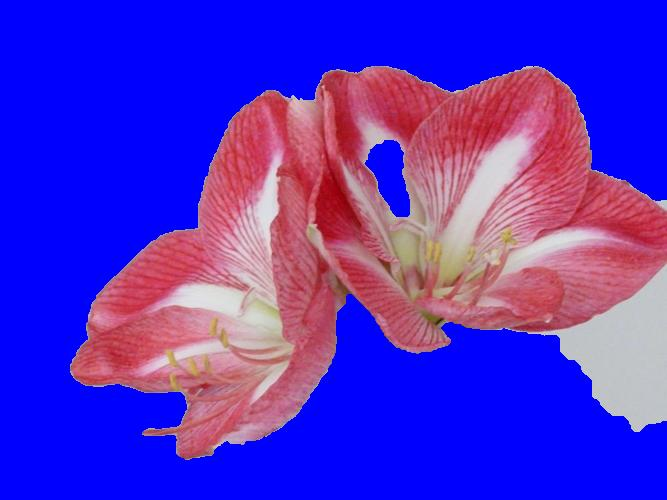

In [79]:
img

In [87]:
img.getextrema()

((0, 255), (0, 243), (0, 255))

In [89]:
count = 0
for img in seg_data:
  if img.getextrema() == ((0, 0), (0, 0), (254, 254)):
    count += 1

print(count)

220


In [76]:
all_blue

False

In [73]:
pixel

array([  0,   0, 254], dtype=uint8)